<a href="https://colab.research.google.com/github/GiaHan2702/lab1_intro_python/blob/main/perceptron_lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
features = np.array([[2.38, 1.06],
                    [2.5, 1.07],
                    [2.29, 1.04],
                    [1.98, 1.39],
                    [1.73, 1.98],
                    [1.28, 1.39],
                    [0.92, 1.44],
                    [1.78, 1.55]])
labels= np.array([[0],
                    [0],
                    [0],
                    [0],
                    [1],
                    [1],
                    [1],
                    [1]])
print(features)
print(labels)

[[2.38 1.06]
 [2.5  1.07]
 [2.29 1.04]
 [1.98 1.39]
 [1.73 1.98]
 [1.28 1.39]
 [0.92 1.44]
 [1.78 1.55]]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [52]:
# define activation function sigmoid
def sigmoid_func(x):
  return 1/(1+np.exp(-x))

# training simple perceptron function
# parameters: learning rates, ....
def train_perceptron(X_train, y_train, parameters) :

  #read the numbers of samples and number of features 
  n_samples, n_feautures = X_train.shape

  # init para (should be a random number)
  w1 = 0.05
  w2 = 0.04

  #bias 
  b = 0

  # define error
  # loss function mean square error
  MSE= []

  learningrate= parameters['learning_rate']
  n_iters= parameters['iteration']

  #learning weight
  for _ in range(n_iters):
    MSE_temp = 0
    for index, x_i in enumerate(X_train):
      x1= x_i[0]
      x2= x_i[1]
      yd= y_train [index,0]

      z= w1*x1 + w2*x2 + b
      y= sigmoid_func(z)

      # calculate derivative  of error/ w1
      y_deri= y*(1-y)
      dE_dw1= -2*(yd-y)*y_deri*x1
      dE_dw2= -2*(yd-y)*y_deri*x2

      w1= w1- learningrate*dE_dw1
      w2= w2- learningrate*dE_dw2
      #bias
      b= b- learningrate*(-2*(yd-y)*y_deri)

      #update z
      z_new= w1*x1 + w2*x2 + b
      y_new= sigmoid_func(z_new)
      MSE_temp = MSE_temp + (yd-y)**2

      # automatic adding to form an array
    MSE.append(MSE_temp/n_iters)
    # output: weight and bias
  weights = np.array([w1, w2])
  bias = b

  model = {'weights_trained': weights,
           'bias_trained': bias,
           'loss': MSE}
  return model

#define a predict function
def predict(model, X_test):
  weights= model['weights_trained']
  bias= model['bias_trained']
  b = bias
  w1= weights[0]
  w2= weights[1]
  # set a matrix
  y_predicted=  np.zeros((len(X_test),1))
  for index, x_i in enumerate(X_test):
    x1 = x_i[0]
    x2 = x_i[1]

    z= w1*x1 + w2*x2 + b
    y_predicted[index] = sigmoid_func(z)
    # sigmoid is not step func =>

    y_predicted[index] = np.where(y_predicted[index]>0.5,1, 0)
    return y_predicted 


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size= 0.2, random_state= 123
)

print(X_train)
print(y_train)

[[1.98 1.39]
 [1.78 1.55]
 [1.73 1.98]
 [2.29 1.04]
 [1.28 1.39]
 [0.92 1.44]]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [55]:
# set para
parameters= {'learning_rate':0.01,
             'iteration': 40000}
model= train_perceptron(X_train, y_train, parameters)

Text(0, 0.5, 'loss')

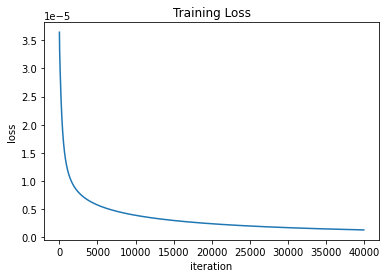

In [56]:
# plot
plt.title("Training Loss")
plt.plot(model['loss'], label= 'Train')
plt.xlabel('iteration')
plt.ylabel('loss')

In [58]:
# 
y_pred = predict(model, X_test)
print('Predicted labels by model')
print(y_pred)
print('True labels')
print(y_test)

Predicted labels by model
[[0.]
 [0.]]
True labels
[[0]
 [0]]
